# Fall 2023 - Final Project - GF180 MPW Shuttle Submission

## Part 1 - Environment Setup and Installation

<b>Assigned (Fall 2023)</b>: 11/27/23<br>
<b>Complete Part 1</b>: 11/29/23 at 12:50pm<br>

<b>Final Project Due (to Get on the Shuttle):</b> <font color="red"><b>12/11/23 at 6:00pm</b></font><br>
<b>Final Project Due (for course credit):</b> <font color="red"><b>12/14/23 at 6:00pm</b></font><br>

## Development Environment Setup

In the Final Project, we will use a <b>Docker container</b>, a technology that emulates an OS without the full overhead of a VM. The container runs a Linux-based operating system, <b>Ubuntu</b>.

> <b>Note:</b> There are two places - at the end of Step 1 and the end of Step 3 - where you will be asked to restart your machine. Ensure you either save all your work and pick a time when you can install and restarting your machine will not be a problem. After Step 3, you can run the scripts while doing other tasks on your computer without issue.

## Introduction

Up to this point, we have used the Cadence Design Systems single-seat license to complete Labs 1-5. Now that you have completed the flow and synthesized the MIPS 8-bit Multiprocessor, we will use an open-source tool flow to create the Final Project.

The <a href = "https://efabless.com/">EFabless</a> ChipIgnite flow provides a "pre-built chip for integrating your custom design and an automated open-source design flow making it easy and affordable." The normal cost for a chip design through ChipIgnite is $$9750. (For perspective, alternatives may cost $35,000.)

For our final project, we will target the <a href = "https://efabless.com/gf-180-open-mpw-shuttle-program">GF180 MPW Open Shuttle Program</a>. Here is what each of those terms means:
<ul>
    <li><b>GF180</b> - The open-source GlobalFoundries 180nm <a href = "https://github.com/efabless/volare">Process Development Kit</a></li>
    <li><b>MPW</b> - Multi-Project Wafer - a fabrication approach which allow customers to share mask and microelectronics wafer fabrication cost between several designs or projects.</li>
    <li><b>Open Shuttle</b> - Fabrications open-source projects specifically supporting digital designs using the OpenLane design flow. <a href = "https://developers.google.com/silicon">Google Custom Silicon</a> covers the costs of fabrication, packaging, evaluation boards, and shipping.</li>
</ul>

Designs are selected through a lottery process along with final review by Google. Preference will be made for submissions containing multiple projects, which is what we will do for this Final Project.


To set up everything we will need for this project, we will be using are <b>Docker</b>, a convenient way to manage virtual environments as “containers”, and <b>Git</b>, the most prominent version control software.

|Tool|Use|
|:---|:---|
|<b>Docker</b>|Software environment virtualization|
|<b>Git</b>|Version control software|
|<b>GitHub</b>|Online code storage and version control|

### Optional: EFabless ChipIgnite Resources
<ul>
    <li><a href = "https://developers.google.com/silicon">Google Custom Silicon</a></li>
    <li><a href = "https://github.com/google/gf180mcu-pdk">GF180MCU PDK</a> repository and documentation</li>
    <li><a href = "https://groups.google.com/g/gf180mcu-pdk-users">gf180mcu-pdk-users@</a> and <a href = "https://groups.google.com/g/gf180mcu-pdk-announce">gf180mcu-pdk-announce@</a> mailing lists</li>
    <li>Open PDK: <a href = "https://github.com/efabless/volare">https://github.com/efabless/volare</a></li>
    <li>OpenLane RTL2GDS Compiler: <a href = "https://github.com/efabless/openlane">https://github.com/efabless/openlane</a></li>
    <li>Caravel Harness: <a href = "https://github.com/efabless/caravel">https://github.com/efabless/caravel</a></li>
    <li>Caravel User Project: <a href = "https://github.com/efabless/caravel_user_project">https://github.com/efabless/caravel_user_project</a></li>
    <li>Open MPW Precheck: <a href = "https://github.com/efabless/open_mpw_precheck">https://github.com/efabless/open_mpw_precheck</a></li>
</ul>

## What is Docker?

<a href = "https://www.docker.com/" target="_blank">Docker</a> is one of the most popular container solutions and widely used in industry. For the Final Project, we use Docker because it lets you run a course container on Windows, macOS, or Linux.

### Step 1: Download and install Docker.

If you have a Windows or Mac, you may download Docker <a href = "https://www.docker.com/products/docker-desktop/" target="_blank">here</a>. On Linux machines, follow the instructions <a href = "https://docs.docker.com/desktop/install/linux-install/" target="_blank">here</a>.

After downloading Docker, follow Docker’s instructions to install it on your OS. Accept if Docker asks for privileged access. Be sure to save everything you are working on, because you will need to close and restart your computer.

On Windows or macOS, open the <i>Docker Desktop</i> application after it has been installed. You may see a message similar to “Docker Desktop is Starting…”. Once this message goes away, your Docker has started successfully!

>If you are asked for log-in information, you can "Skip" this step. We have configured the assignments to ensure you only need the free version of Docker Desktop.

Verify Docker is installed by executing the following command in a terminal (Windows - Command Prompt, MacOS - Terminal)

><code>docker --version</code>

Here is an example from my installation on Windows, where I opened <b>Command Prompt</b>:

<img src ="https://github.com/mmorri22/cse20133/blob/main/homeworks/homework0/homework0-1.png?raw=true">

After installing Docker, a Docker process (the Docker daemon) will run in the background. Run the following command to verify:

><code>docker info</code>

This should print some information about your Docker installation.

<b>Note:</b> If you see the following error:

><code>ERROR: Cannot connect to the Docker daemon at unix:///var/run/docker.sock. Is the docker daemon running?</code>

it means Docker hasn’t started running yet. On Windows or macOS, ensure your Docker Desktop is running. On Linux, try the command <code>sudo systemctl docker restart</code> in a terminal.

If you’re running into other problems while setting up Docker, check out our <a href = "https://github.com/mmorri22/cse20133/blob/main/assets/docker_debugging.ipynb">Docker debugging guide</a>!

<b>For Windows users, go to Step 1.1. For Mac and Linux users, go to Step 1.2</b>

### Step 1.1: Windows Users Only: Windows Subsystem for Linux

To run the following steps in this lab, you will need to set up Windows Subsystem for Linux (WSL). WSL should already be enabled after you install Docker, but you may still need to install a Linux distribution. To establish if you have this setup, perform the following steps:

> <b>Quick Note:</b> In industry, Linux distributions are commonly known as <i>distros</i>.

<b>1.</b> <b>Do I have a Linux distro installed?</b>
    <ul>
        <li>Run <code>wsl --update</code> to ensure you have the most recent version</li>
        <li>Run <code>wsl -l -v</code> in the Command Prompt. If there is only “Docker Desktop” and “Docker Desktop Data”, you do not have a Linux distro installed. Proceed to step 2.</li>
        <li>Otherwise, you have a Linux distro installed. Proceed to step 3.</li>
        <li><b>Note:</b>Docker Desktop installs two special-purpose internal Linux distros, <code>docker-desktop</code> and <code>docker-desktop-data</code>. The first (<code>docker-desktop</code>) is used to run the Docker engine (<code>dockerd</code>) while the second (<code>docker-desktop-data</code>) stores containers and images.</li>
    </ul>
    
<b>2.</b> <b>Install a Linux Distribution.</b>
    <ul>
        <li>Run <code>wsl --set-default-version 2</code> to ensure Ubuntu will be installed under WSL 2.</li>
            <li>Install “Ubuntu 20.04” from Microsoft Store. (link <a href = "https://apps.microsoft.com/store/detail/ubuntu-20046-lts/9MTTCL66CPXJ?hl=en-us&gl=us">Here</a>)</li>
        <li>Click “Open” after Ubuntu is downloaded. A terminal will open and guide you through the installation process. (For the username/password, students have found using their Notre Dame netID and password maintains the simplicity of remembering their information.)</li>
    </ul>
    
<b>3.</b> <b>Ensure your Linux Distribution runs on WSL 2.</b>
    <ul>
        <li>Run <code>wsl -l -v</code> in the Command Prompt</li>
        <li>If the <code>Ubuntu</code> distribution is running on Version 2, proceed to Step 4.</li>
        <li>Otherwise, run <code>wsl --set-version < distro name > 2</code> to update your distro to use WSL 2. For example, my version is Ubuntu-20.04, so the command would be <code>wsl --set-version Ubuntu-20.04 2</code>.</li>
    </ul>

<b>4.</b> <b>Set your default Linux distro</b>
    <ul>
        <li>Run <code>wsl --setdefault < distro-name > </code> to configure your default Linux distro. <distro-name> should be “Ubuntu-20.04” if you installed using step 2.</li>
            <li>Example: <code>wsl --setdefault Ubuntu-20.04</code></li>
            <li>The response should be <code>The operation was completed successfully</code>
    </ul>
    
Enter <code>wsl</code> in your Command Prompt, and you’ll enter into your WSL! 

You will also need to connect Docker with WSL. To do so, open your Docker Desktop’s settings (on its top right corner), click “Resources”, “WSL integration”, then enable integration with your Linux distribution. The <code>Ubuntu-20.04</code> should be listed and not selected. Select <code>Ubuntu-20.04</code>. Then, click “Apply and Restart”.
            
### Step 1.2 - Restart your Machine
    
At this point, close both the Docker and the Command Prompt/Terminal. We are doing this so you can get practice with starting Docker and Command Prompt/Terminal in Step 2. Furthermore, it will ensure that the Docker is able to connect to the Internet once you restart. Restart your computer.

## Step 2 - VS Code

> <b>Note 1:</b> These steps assume you have successfully installed Docker Desktop, and that your <code>cse30342-container</code> is running, just like in Step 2.5, and that you successfully completed the setup script in Step 3.

### Step 2.1 - Download VSCode

<b>1.</b> Make sure your course container is running.

<b>2.</b> Go to the <a href = "https://code.visualstudio.com/insiders/">VS Code Insiders</a> page and download Visual Studio Code Insiders on your own computer. The website will detect your Operating System and recommend the appropriate version.

<b>3.</b> Run the executable for VSCode.

<b>4.</b> Open VSCode, and on the left, select the icon for Extensions 
<img src = "https://i.imgur.com/x7Nedgs.png">

<b>5.</b> Search for and Install the “Docker”, “Dev Containers”, and “WSL” VSCode extensions via the extensions tab.

## Step 3 - Enabling Docker in the WSL/Terminal

In this step, you will ensure that Docker is available without root. This is a mandatory step. Without this, most OpenLane scripts will error out with permission issues. A majority of installation issues from users come from people skipping this step. 

<b>Windows Users Only:</b> Open the Command Prompt, and then type <code>wsl</code> to run Ubuntu to run the Linux Command Line.

<b>Mac/Linux Users Only</b> Open the Terminal.

<b>Both</b>:

From the Linux Command Line, perform the following command:

    docker run hello-world
    
You should get a message that includes following statement:

    Hello from Docker!
    This message shows that your installation appears to be working correctly.
    
Next, run the following commands to be able to install OpenLane

> <b>Note:</b> If you are prompted for a password for sudo, use the password for your account on your laptop.

    sudo apt-get update
    sudo apt-get upgrade
    sudo apt install -y build-essential python python3 python3-venv python3-virtualenv make git
    sudo apt install -y tcsh tcl-dev tk-dev libcairo2-dev m4
    
Next, you will need to make Docker available without root. 

    sudo groupadd docker
    sudo usermod -aG docker $USER
    sudo reboot

Restart your Machine.

> <b>This is the second and final time you will need to restart your machine. Everything else will be completable without restarting at all. You will be able to complete other tasks while letting the scripts run from here on out.</b>

## Step 4 - Running VS Code from the Linux Terminal.

Now that VS Code is installed and that you have a Linux Distro running on your machine, you will be able to open VS Code directly from the Linux Distro.

If you use Windows, go to Steo 4.1. If you are using a Mac/Linux, go to Step 4.2

### Step 4.1 - Windows Users Only

Open your version of VS Code. At the bottom, you will see a Terminal. Enter <code>wsl</code> in your Command Prompt. You will start the system this way every time from now on.

Go to Step 5

### Step 4.2 - Mac/Linux Users

Open the Terminal. From the command line, type the command:

    code

You will start the system this way every time from now on.

Go to Step 5

## Step 5 - Installing the Dependencies for OpenLane

<a href = "https://efabless.com/openlane">OpenLane</a> is a Python-based infrastructure designed for implementing Application-Specific Integrated Circuits (ASICs). Using just a high-level hardware description and simple configuration variables, OpenLane empowers you to design your own silicon, relying entirely on open-source utilities.

### How OpenLane Works

OpenLane operates on modular "Steps" that can be combined to form "Flows." Each Step has defined inputs and outputs, enabling the creation of highly complex chip layouts through their sequential chaining.

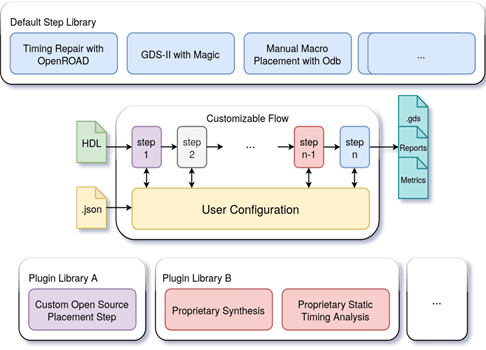
    
Next, install <a href = "https://www.klayout.de/intro.html">KLayout</a>, which is an open-source tool for viewing layouts. (Somewhat similar to LayoutGXL in the Cadence Virtuoso suite)

    sudo apt install klayout
 
We can open the KLayout tool from the VS Code Terminal command line as follows:

    klayout -e &

> <b>Note:</b> The <code>-e</code> flag is required in order to be able to perform edits. The <code>&</code> flag serves the same purpose as it does when we used it for the command <code>virtuso -64 &</code>, which means we can still use the terminal.

Close out of klayout.

## Step 6 - Setting up your Git Repository and Cloning Caravel

### Step 6.1 - Create a GitHub Account

In order to be able to submit your final project to the Google shuttle, you will need to be able to create a GitHub repository. <b>If you already have a GitHub account, go to Step 5.2</b>.

 If you do not have a GitHub account, they are cheap as free. Go to the <a href = "https://github.com/">GitHub Main Page</a>, select Sign Up on the top right, and then follow the directions. For simplicity, use your Notre Dame email, and map to your netID to your GitHub user name if it is available. If the netID is not avaiable, that is OK! Just make sure your group members know your GitHub account.
 
### Step 6.2 - Cloning the Caravel Repository into VS Code

Caravel is a template SoC for Efabless Open MPW and chipIgnite shuttles. The Datasheet and detailed documentation exist <a href = "https://caravel-harness.readthedocs.io/en/latest/">here</a>.

    git clone https://github.com/efabless/caravel_user_project.git

   
Next, we will establish <b>environment variables</b>, such as the locations of the PDKs and ASIC tools. This is <i>similar</i> to the process of running <code>source cadence_nd.sh</code> and then changing into <code>cd VLSI</code> to getting everything running. 

From the VS Code Terminal, perform the following two commands

    mkdir asic

Next, copy the result of the following command:

    pwd
    
> For example, my result was: <code><font color = "red">/mnt/c/Users/mmorri22</font></code>. This result will be what I use for <code>$(pwd)</code> in the next step.

Perform the following commands to set Environment variables (replacing <code>[pwd]</code> with the value you copied)
    
    export OPENLANE_ROOT=[pwd]/asic/openlane
    export PDK_ROOT=[pwd]/asic/pdk</code>
    
> For example, here were my commands:<br>
> <code>export OPENLANE_ROOT=<font color = "red">/mnt/c/Users/mmorri22</font>/asic/openlane</code><br>
> <code>export PDK_ROOT=<font color = "red">/mnt/c/Users/mmorri22</font>/asic/pdk</code><br>

### Step 6.5 - Creating a Start Script

Copy both of those <code>export</code> commands. Create a script file

    touch exports.sh
    vim exports.sh
    
Add both of those lines to your <code>exports.sh</code> file. (Recall the <code>Ctrl-Shift-Right click</code> trick to paste in <b>vim</b> My contents are:

<code>export OPENLANE_ROOT=/mnt/c/Users/mmorri22/asic/openlane</code><br>
<code>export PDK_ROOT=/mnt/c/Users/mmorri22/asic/pdk</code><br>

> In future iterations, we will be using this file to start up before we start to set up the Environment Variables.


### Step 6.6 - Install Caravel and the GlobalFoundries 180nm PDK
 
Perform these steps to setup the OpenLane:

    cd caravel_user_project
    git checkout gfmpw-1c
    make setup

> Note: Be absolutely sure you perform the <code>git checkout gfmpw-1c</code> before running <code>make setup</code>

This installation will take about 5-10 minutes. (It is normal to appear to "hang" on certain instructions for a couple of minutes.)

To check that the PDKs were installed correctly, perform the command <code>ls ../asic/pdk</code>. This is what you should see:

    ls ../asic/pdk
    gf180mcuA  gf180mcuB  gf180mcuC  gf180mcuD  volare

For this particular shuttle, we will be using <b>gf180mcuC</b>.

### Step 6.7 - Checking the Installation

The final step will be to compile and check some test runs to make sure everything is set up properly.

From the VS Code Terminal in the <code>caravel_user_project</code> folder, perform the following command:

    ls open
    
You will see a Makefile and two directories:

    Makefile  user_proj_example  user_project_wrapper

<ul>
    <li><code>user_proj_example</code> - The example project we will use to compile and test the setup</li>
    <li><code>user_proj_wrapper</code> - The wrapper for building the Caravel Harness</li>
</ul>

To run the test, run the following command in the <code>caravel_user_project</code> folder

    make user_proj_example
    
This test can take a fairly long time. It will run up to <b>Step 49</b>. This is a good stage to work on something else or get some well-earned rest.

> In industry, it is common for compilation - for hardware <i>and</i> software to take several hours... or even days. There is a reason professionals appreciate this specific XKCD comic:

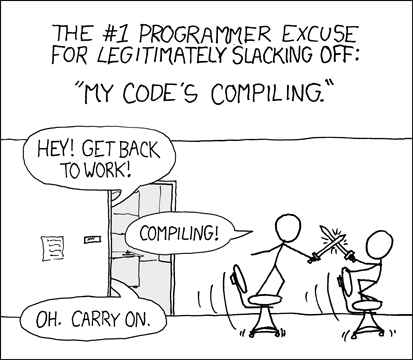

### Step 7 - Open the Synthesized User Project Example

Next, check the gds file:

    ls gds/
    
This is what you should be able to view:

    user_proj_example.gds  user_project_wrapper.gds

To verify it works, perform the following command:

    klayout -e gds/user_proj_example.gds &
    
Hovering your mouse over the large chip and zooming in will help you see the design much more clearly. We will study KLayout in more detail on Wednesday, but if KLayout opens and you see a big rectangle representing a chip, you are set for Wednesday's lecture. 